In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# file = 'output.csv'
# df = pd.read_csv(file)

# print(df)

In [5]:
def read_binary(restartfile):

    """
    "[...] numpy function to convert things from fortran ordered to c ordered "

    numpy.ascontiguousarray(a, dtype=None, *, like=None)

    Return a contiguous array (ndim >= 1) in memory (C order).

    """

    intchunk = np.dtype(np.int32).itemsize
    realchunk = np.dtype(np.float64).itemsize

    ncolx = np.fromfile(restartfile, dtype=np.int32, count=1, offset=0)[0]
    ncoly =  np.fromfile(restartfile, dtype=np.int32, count=1, offset=(0*realchunk+1*intchunk))[0]
    ncolz =  np.fromfile(restartfile, dtype=np.int32, count=1, offset=(0*realchunk+2*intchunk))[0]

    print(ncolx, ncoly, ncolz)

    nprod = ncolx*ncoly*ncolz

    rlam = np.fromfile(restartfile, dtype=np.float64, count=nprod*2, offset=(0*realchunk+3*intchunk)).reshape(2,ncolz,ncoly,ncolx)

    rho = np.fromfile(restartfile, dtype=np.float64, count=nprod*2, offset=(2*nprod*realchunk+3*intchunk)).reshape(2,ncolz,ncoly,ncolx)

    tau = np.fromfile(restartfile, dtype=np.float64, count=nprod*2, offset=(4*nprod*realchunk+3*intchunk)).reshape(2,ncolz,ncoly,ncolx)

    currnt = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(6*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    sodens = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(12*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    spinden = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(18*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    kinvden = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3, offset=(24*nprod*realchunk+3*intchunk)).reshape(2,3,ncolz,ncoly,ncolx)

    spincur = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3*3, offset=(30*nprod*realchunk+3*intchunk)).reshape(2,3,3,ncolz,ncoly,ncolx)

    drhos = np.fromfile(restartfile, dtype=np.float64, count=nprod*2*3*2, offset=(48*nprod*realchunk+3*intchunk)).reshape(2,3,2,ncolz,ncoly,ncolx)

    return ncolx, ncoly, ncolz, rlam, rho, tau, currnt, sodens, spinden, kinvden, spincur, drhos

file = 'rlambda.dat'

ncolx, ncoly, ncolz, rlam, rho, tau, currnt, sodens,spinden,kinvden,spincur,drhos = read_binary(file)

24 24 24


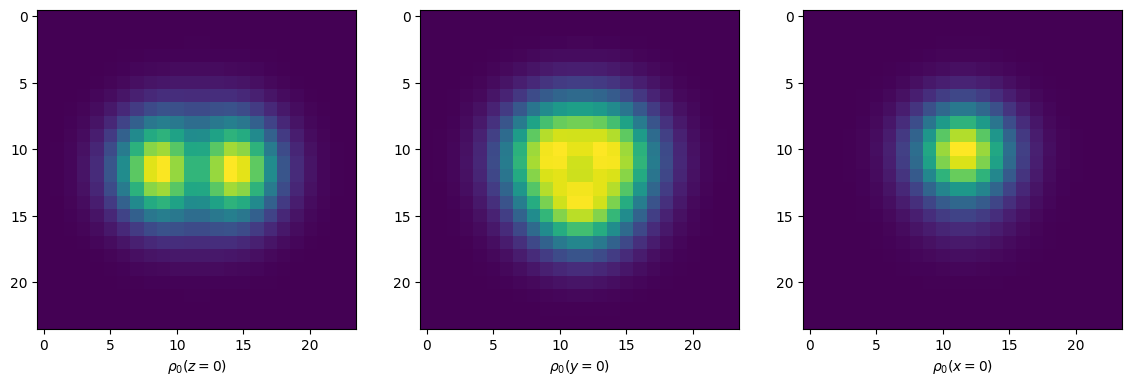

In [8]:
fs = 14
fig,axes = plt.subplots(1,3,figsize=(fs,fs))

axes[0].imshow(rho[0,0,:,:])

# axes[0].set_xlim(7,33)
#axes[0].set_ylim(3,20)
axes[0].set_xlabel(r'$\rho_0(z=0)$')

axes[1].imshow(rho[0,:,0,:])#,interpolation='gaussian')

# axes[1].set_xlim(5,35)
# axes[1].set_ylim(5,35)
axes[1].set_xlabel(r'$\rho_0(y=0)$')

axes[2].imshow(rho[0,:,:,0])#),interpolation='gaussian')

# axes[2].set_xlim(3,20)
# axes[2].set_ylim(8,28)
axes[2].set_xlabel(r'$\rho_0(x=0)$');

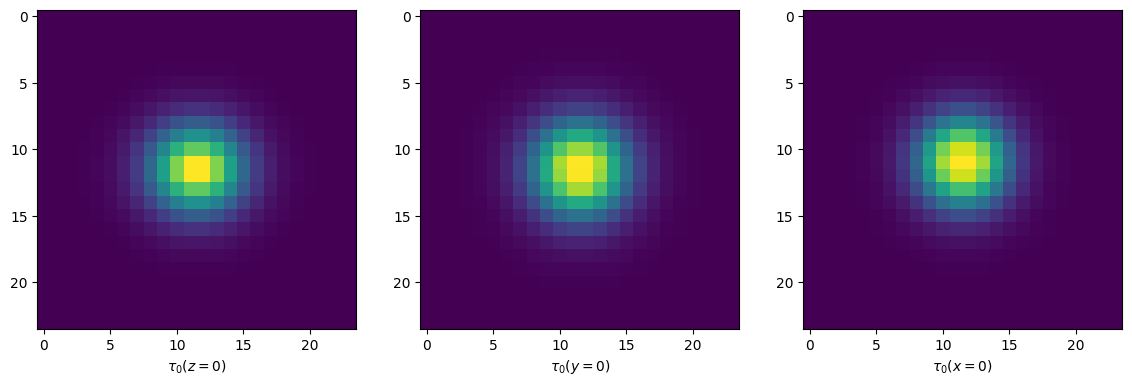

In [9]:
fs = 14
fig,axes = plt.subplots(1,3,figsize=(fs,fs))

axes[0].imshow(tau[0,0,:,:])

# axes[0].set_xlim(7,33)
#axes[0].set_ylim(3,20)
axes[0].set_xlabel(r'$\tau_0(z=0)$')

axes[1].imshow(tau[0,:,0,:])#,interpolation='gaussian')

# axes[1].set_xlim(5,35)
# axes[1].set_ylim(5,35)
axes[1].set_xlabel(r'$\tau_0(y=0)$')

axes[2].imshow(tau[0,:,:,0])#),interpolation='gaussian')

# axes[2].set_xlim(3,20)
# axes[2].set_ylim(8,28)
axes[2].set_xlabel(r'$\tau_0(x=0)$');

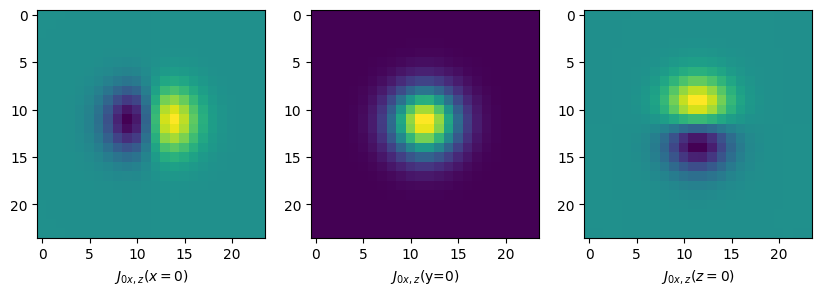

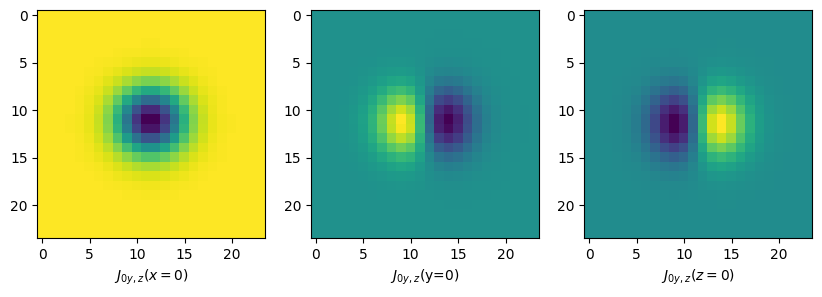

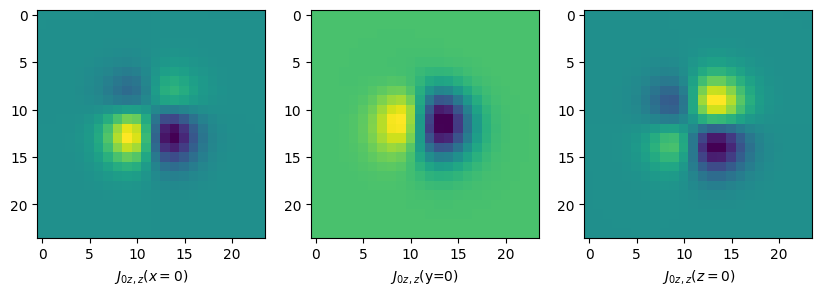

In [14]:
jx = currnt[0,0,:,:,:]
jy = currnt[0,1,:,:,:]
jz = currnt[0,2,:,:,:]

jl = [jx,jy,jz]
jsl = [r'$J_{0x}$',r'$J_{0y}$',r'$J_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = jl[i]
    js = jsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,0])
    ax[0].set_xlabel(js+r'$_{,z}(x=0)$')
    ax[1].imshow(je[:,0,:])
    ax[1].set_xlabel(js+r'$_{,z}$(y=0)')
    ax[2].imshow(je[0,:,:])
    ax[2].set_xlabel(js+r'$_{,z}(z=0)$')

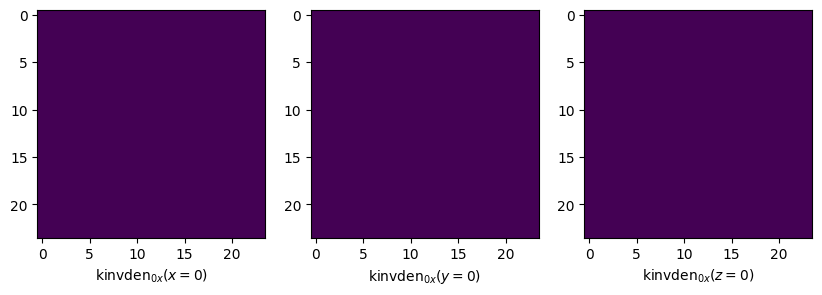

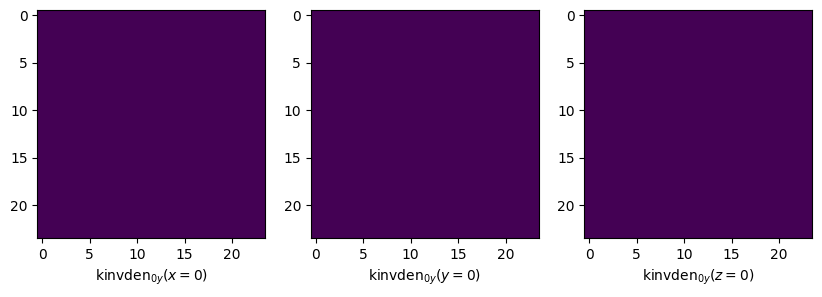

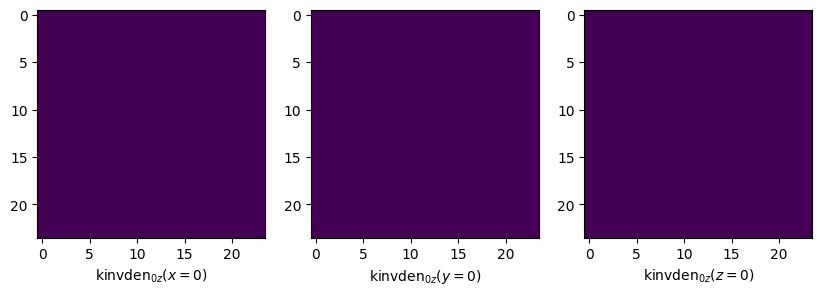

In [15]:
kinvdenx = kinvden[0,0,:,:,:]
kinvdeny = kinvden[0,1,:,:,:]
kinvdenz = kinvden[0,2,:,:,:]

kl = [kinvdenx,kinvdeny,kinvdenz]
ksl = [r'kinvden$_{0x}$',r'kinvden$_{0y}$',r'kinvden$_{0z}$']

fs = 10

for i in range(len(jl)) :

    kinvdene = kl[i]
    ks = ksl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(kinvdene[:,:,0])
    ax[0].set_xlabel(ks+r'$(x=0)$')
    ax[1].imshow(kinvdene[:,0,:])
    ax[1].set_xlabel(ks+r'$(y=0)$')
    ax[2].imshow(kinvdene[0,:,:])
    ax[2].set_xlabel(ks+r'$(z=0)$')

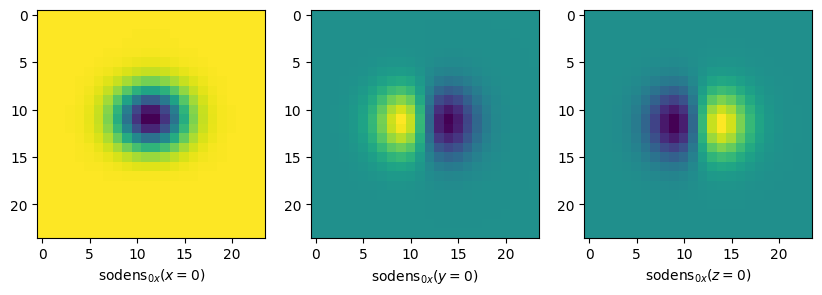

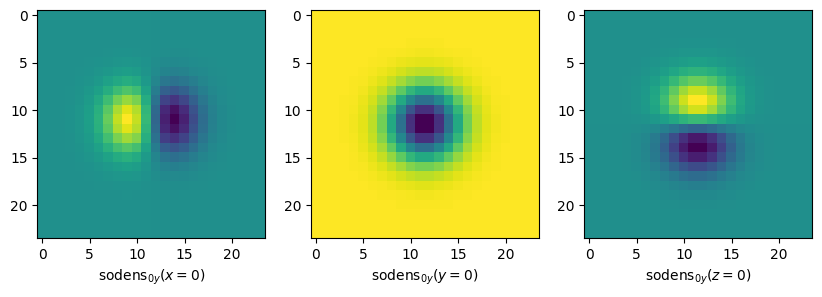

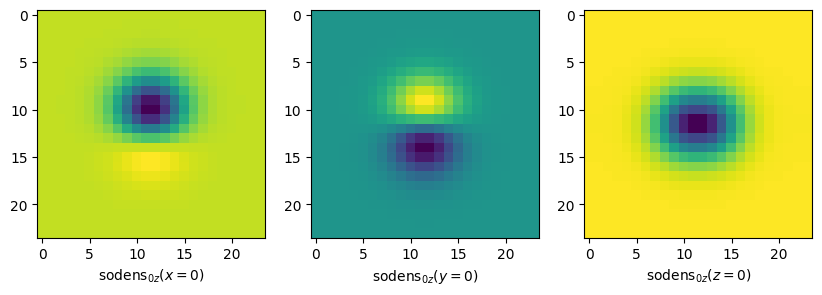

In [16]:
sodensx = sodens[0,0,:,:,:]
sodensy = sodens[0,1,:,:,:]
sodensz = sodens[0,2,:,:,:]

sodl = [sodensx,sodensy,sodensz]
sodsl = [r'sodens$_{0x}$',r'sodens$_{0y}$',r'sodens$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,0])
    ax[0].set_xlabel(js+r'$(x=0)$')
    ax[1].imshow(je[:,0,:])
    ax[1].set_xlabel(js+r'$(y=0)$')
    ax[2].imshow(je[0,:,:])
    ax[2].set_xlabel(js+r'$(z=0)$')

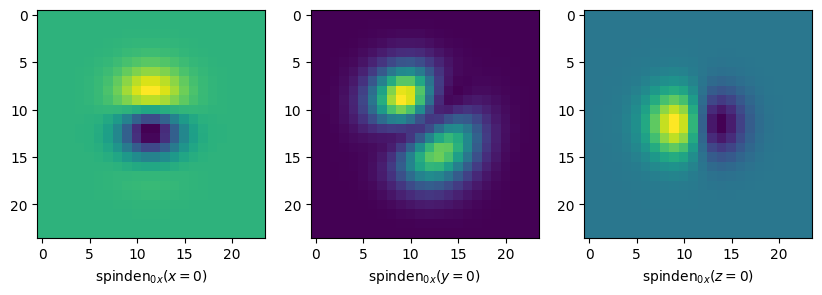

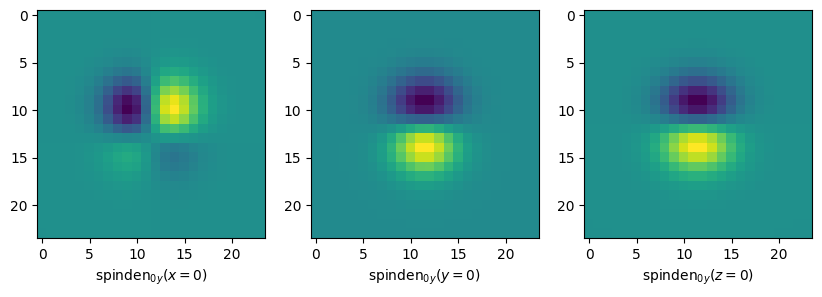

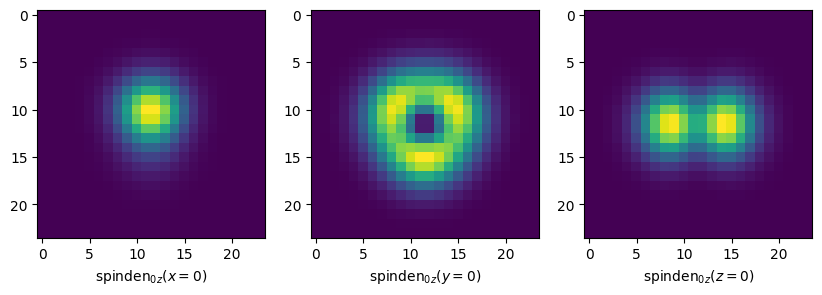

In [17]:
spindenx = spinden[0,0,:,:,:]
spindeny = spinden[0,1,:,:,:]
spindenz = spinden[0,2,:,:,:]

sodl = [spindenx,spindeny,spindenz]
sodsl = [r'spinden$_{0x}$',r'spinden$_{0y}$',r'spinden$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,0])
    ax[0].set_xlabel(js+r'$(x=0)$')
    ax[1].imshow(je[:,0,:])
    ax[1].set_xlabel(js+r'$(y=0)$')
    ax[2].imshow(je[0,:,:])
    ax[2].set_xlabel(js+r'$(z=0)$')

0.027388371684214926
0.024675448034855923
0.029730033702596415


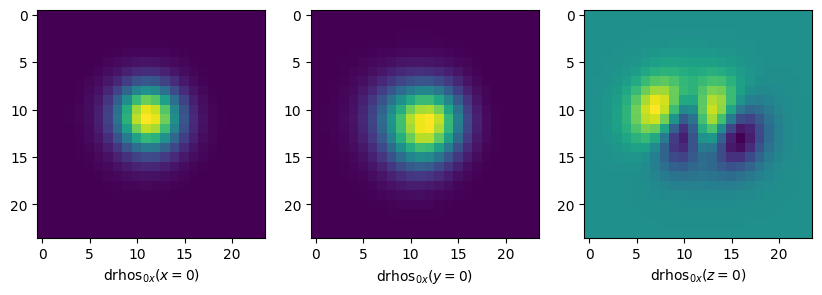

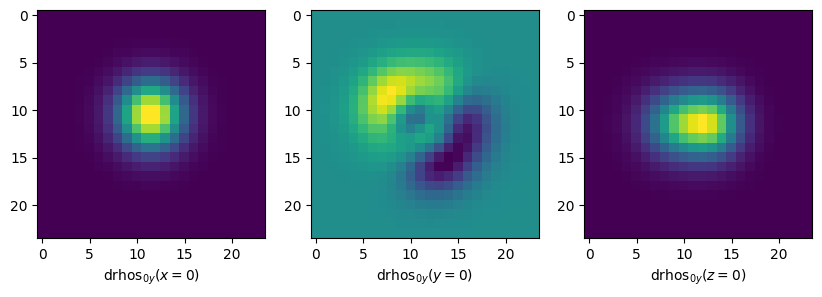

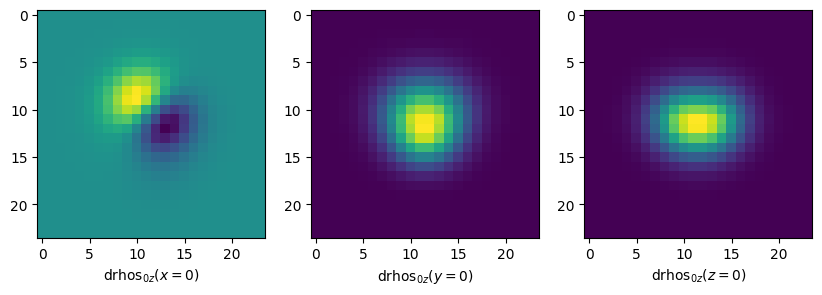

In [ ]:
drhosx = drhos[0,0,0,:,:,:]+drhos[0,0,1,:,:,:]
drhosy = drhos[0,1,0,:,:,:]+drhos[0,1,1,:,:,:]
drhosz = drhos[0,2,0,:,:,:]+drhos[0,2,1,:,:,:]

sodl = [drhosx,drhosy,drhosz]
sodsl = [r'drhos$_{0x}$',r'drhos$_{0y}$',r'drhos$_{0z}$']

fs = 10

for i in range(len(jl)) :

    je = sodl[i]
    js = sodsl[i]

    fig,ax=plt.subplots(1,3,figsize=(fs,fs))

    ax[0].imshow(je[:,:,0])
    ax[0].set_xlabel(js+r'$(x=0)$')
    ax[1].imshow(je[:,0,:])
    ax[1].set_xlabel(js+r'$(y=0)$')
    ax[2].imshow(je[0,:,:])
    ax[2].set_xlabel(js+r'$(z=0)$')